In [97]:
# thanks to 준혁!!!!

In [60]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc

In [61]:
data=pd.read_csv('data.csv', index_col=0)
data.head(3)

,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,...,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
index,,,,,,,,,,,,,,,,,,,,,
0,3.0,363,4.0,1370,5.0,997,1.0,1024,2.0,1577,...,0,1,0,1,1,0,1,0,1,1
1,5.0,647,5.0,1313,3.0,3387,5.0,2969,1.0,4320,...,1,1,0,1,1,0,1,0,1,1
2,4.0,1623,1.0,1480,1.0,1021,4.0,3374,5.0,1333,...,1,1,0,1,1,1,1,0,1,1


In [62]:
#필요한 열만으로 편집
data = data[['age_group','education','familysize', 'married','urban','tp05', 'tp06']]

In [63]:
#점수 변환
data['tp05']=7-data['tp05']
data['tp06']=7-data['tp06']

#50대 이상 합치기
data['age_group'] = data['age_group'].apply(lambda x:'+50s' 
                                            if x in ['50s','60s','+70s'] else x)

#가족 수가 6이상인걸 하나로 합치기
data.familysize=data.familysize.apply(lambda x:'+6'if x >=6 else x)

In [64]:
#무응답 제거
tp05 = data[data['tp05']!=0]
print((tp05['tp05']==0).sum())

tp06 = data[data['tp06']!=0]
print((tp06['tp06']==0).sum())

0
0


In [121]:
#tp05 pivot table 생성
tp05_education_pivot = pd.pivot_table(data=tp05, index='education', columns='tp05', aggfunc='size')
tp05_education = tp05_education_pivot.div(tp05_education_pivot.sum(axis=1), axis=0) * 100

tp05_married_pivot = pd.pivot_table(data=tp05, index='married', columns='tp05', aggfunc='size')
tp05_married = tp05_married_pivot.div(tp05_married_pivot.sum(axis=1), axis=0) * 100

tp05_familysize_pivot = pd.pivot_table(data=tp05, index='familysize', columns='tp05', aggfunc='size')
tp05_familysize = tp05_familysize_pivot.div(tp05_familysize_pivot.sum(axis=1), axis=0) * 100

tp05_urban_pivot = pd.pivot_table(data=tp05, index='urban', columns='tp05', aggfunc='size')
tp05_urban = tp05_urban_pivot.div(tp05_urban_pivot.sum(axis=1), axis=0) * 100

In [122]:
#tp06 pivot table 생성
tp06_education_pivot = pd.pivot_table(data=tp06, index='education', columns='tp06', aggfunc='size')
tp06_education = tp06_education_pivot.div(tp06_education_pivot.sum(axis=1), axis=0) * 100

tp06_married_pivot = pd.pivot_table(data=tp06, index='married', columns='tp06', aggfunc='size')
tp06_married = tp06_married_pivot.div(tp06_married_pivot.sum(axis=1), axis=0) * 100

tp06_familysize_pivot = pd.pivot_table(data=tp06, index='familysize', columns='tp06', aggfunc='size')
tp06_familysize = tp06_familysize_pivot.div(tp06_familysize_pivot.sum(axis=1), axis=0) * 100

tp06_urban_pivot = pd.pivot_table(data=tp06, index='urban', columns='tp06', aggfunc='size')
tp06_urban = tp06_urban_pivot.div(tp06_urban_pivot.sum(axis=1), axis=0) * 100

In [123]:
# 교육수준, 유년기배경 무응답 삭제
tp05_education.drop([0], inplace=True)
tp06_education.drop([0], inplace=True)
tp05_urban.drop([0], inplace=True)
tp06_urban.drop([0], inplace=True)
tp05_married.drop([0], inplace=True)
tp06_married.drop([0], inplace=True)

In [68]:
#한글 안깨지게
rc('font', family='NanumGothic')

plt.rcParams['axes.unicode_minus'] = False

In [69]:
print('# 설정 되어있는 폰트 사이즈')
print (plt.rcParams['font.size'] ) 
print('# 설정 되어있는 폰트 글꼴')
print (plt.rcParams['font.family'] )

# 설정 되어있는 폰트 사이즈
10.0
# 설정 되어있는 폰트 글꼴
['NanumGothic']


In [70]:
col=['#2913E8','#5789F7','#A0CBFF','#5271FF','#57A2F7','#2ECBFF','#7214FF','#8771FF','#892EE8']

# 교육수준
## tp05

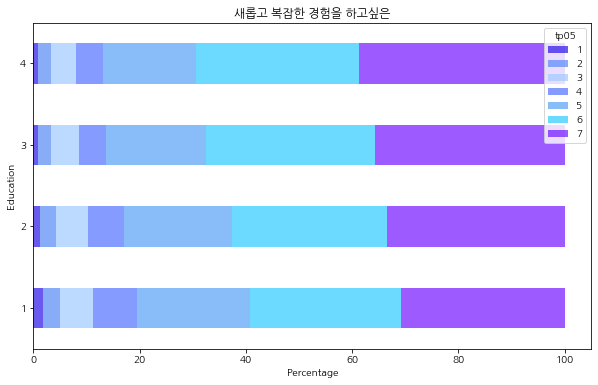

In [102]:
tp05_education.plot(kind='barh', figsize=(10,6),stacked=True, color=col,alpha = 0.7)
plt.xlabel('Percentage')
plt.ylabel('Education')
plt.title('새롭고 복잡한 경험을 하고싶은')
plt.show()

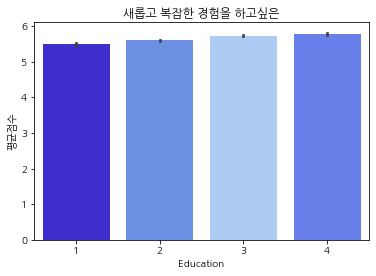

In [72]:
data_tp05_edu = data[data['education']!=0]
sns.barplot(data = data_tp05_edu, x='education', y='tp05', estimator=np.mean, palette=col)
plt.xlabel('Education')
plt.ylabel('평균점수')
plt.title('새롭고 복잡한 경험을 하고싶은')
plt.show()

## tp06

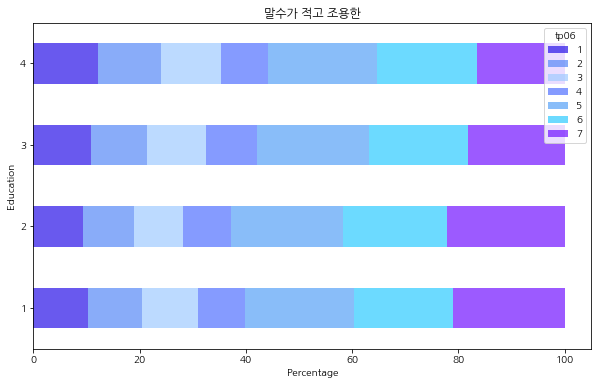

<Figure size 432x288 with 0 Axes>

In [99]:
tp06_education.plot(kind='barh', figsize=(10,6),stacked=True, color=col,alpha = 0.7)
plt.xlabel('Percentage')
plt.ylabel('Education')
plt.title('말수가 적고 조용한')

plt.show()

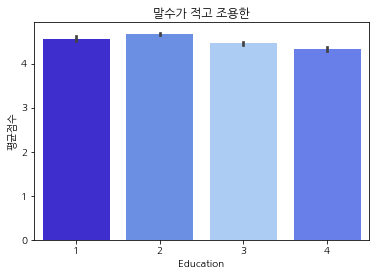

In [74]:
data_tp06_edu = data[data['education']!=0]
sns.barplot(data = data_tp06_edu, x='education', y='tp06', estimator=np.mean, palette=col)
plt.xlabel('Education')
plt.ylabel('평균점수')
plt.title('말수가 적고 조용한')
plt.show()

# 결혼유무
## tp05

* 0을 넣을지 말지 내일 고민

In [124]:
data.married.value_counts()

1    31550
2    10059
3     3830
0       93
Name: married, dtype: int64

In [125]:
tp05_married

tp05,1,2,3,4,5,6,7
married,,,,,,,
1,1.174561,2.747008,5.735931,6.471225,20.126687,29.160300,34.584288
2,0.953145,2.829337,5.548309,5.668707,18.109762,32.657771,34.232969
3,1.115242,2.602230,4.062666,3.956452,16.728625,32.766861,38.767924


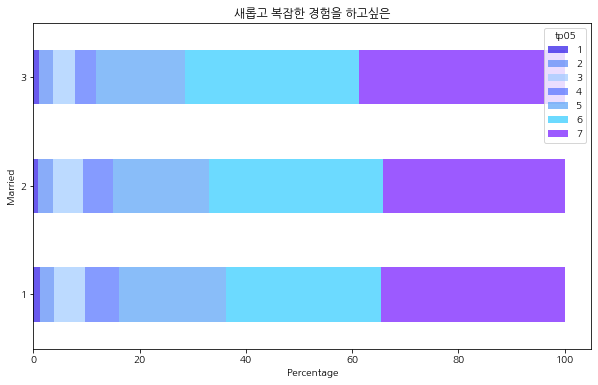

In [128]:
tp05_married.plot(kind='barh', figsize=(10,6),stacked=True, color=col,alpha = 0.7)
plt.xlabel('Percentage')
plt.ylabel('Married')
plt.title('새롭고 복잡한 경험을 하고싶은')
plt.show()

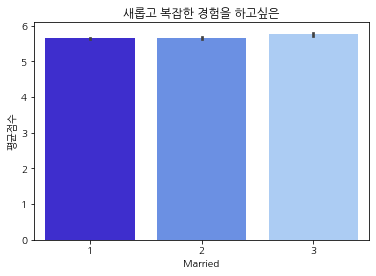

In [129]:
data_tp05_married = data[data['married']!=0]
sns.barplot(data = data_tp05_married, x='married', y='tp05', estimator=np.mean, palette=col)
plt.xlabel('Married')
plt.ylabel('평균점수')
plt.title('새롭고 복잡한 경험을 하고싶은')
plt.show()

## tp06

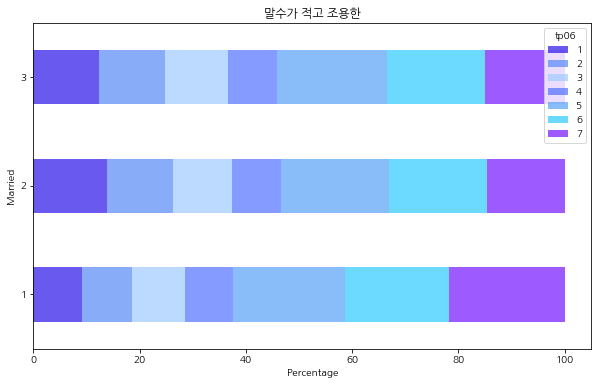

In [131]:
tp06_married.plot(kind='barh', figsize=(10,6),stacked=True, color=col,alpha = 0.7)
plt.xlabel('Percentage')
plt.ylabel('Married')
plt.title('말수가 적고 조용한')
plt.show()

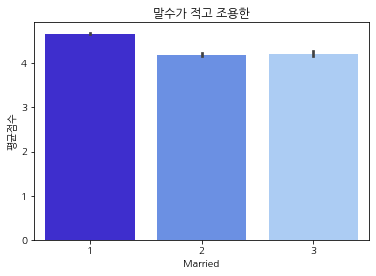

In [130]:
data_tp06_married = data[data['married']!=0]
sns.barplot(data = data_tp06_married, x='married', y='tp06', estimator=np.mean, palette=col)
plt.xlabel('Married')
plt.ylabel('평균점수')
plt.title('말수가 적고 조용한')
plt.show()

# 유년기 배경
## tp05

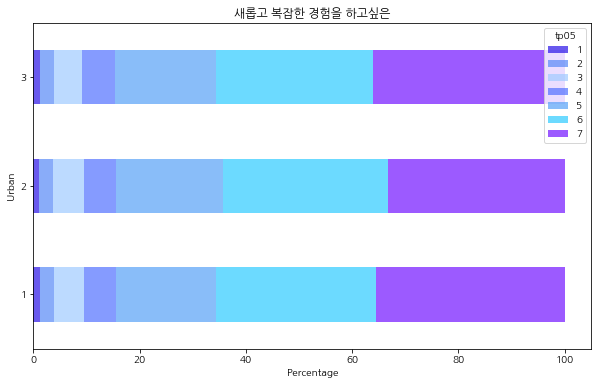

In [79]:
tp05_urban.plot(kind='barh', figsize=(10,6),stacked=True, color=col,alpha = 0.7)
plt.xlabel('Percentage')
plt.ylabel('Urban')
plt.title('새롭고 복잡한 경험을 하고싶은')
plt.show()

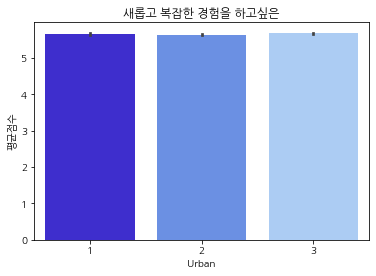

In [80]:
data_tp05_urban = data[data['urban']!=0]
sns.barplot(data = data_tp05_urban, x='urban', y='tp05', estimator=np.mean, palette=col)
plt.xlabel('Urban')
plt.ylabel('평균점수')
plt.title('새롭고 복잡한 경험을 하고싶은')
plt.show()

## tp06

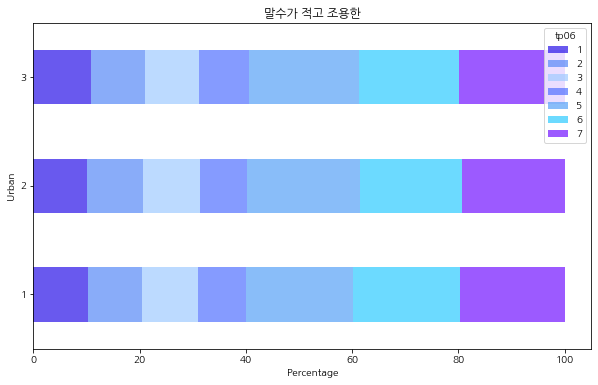

In [81]:
tp06_urban.plot(kind='barh', figsize=(10,6),stacked=True, color=col,alpha = 0.7)
plt.xlabel('Percentage')
plt.ylabel('Urban')
plt.title('말수가 적고 조용한')
plt.show()

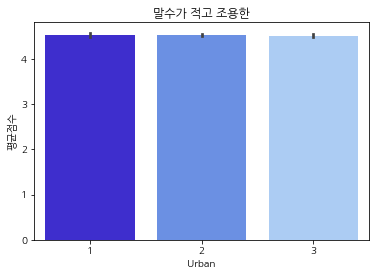

In [82]:
data_tp06_urban = data[data['urban']!=0]
sns.barplot(data = data_tp06_urban, x='urban', y='tp06', estimator=np.mean,palette=col)
plt.xlabel('Urban')
plt.ylabel('평균점수')
plt.title('말수가 적고 조용한')
plt.show()

# 가족구성원 수
## tp05

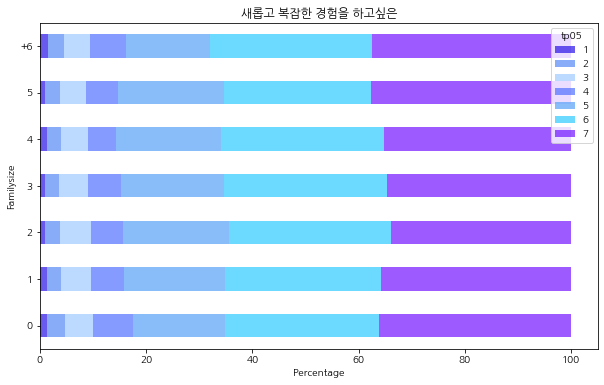

In [83]:
tp05_familysize.plot(kind='barh', figsize=(10,6),stacked=True, alpha = 0.7, color=col)
plt.xlabel('Percentage')
plt.ylabel('Familysize')
plt.title('새롭고 복잡한 경험을 하고싶은')
plt.show()

In [84]:
mean_score = data.groupby(['familysize'])['tp05'].mean().to_frame().sort_values(by='tp05')

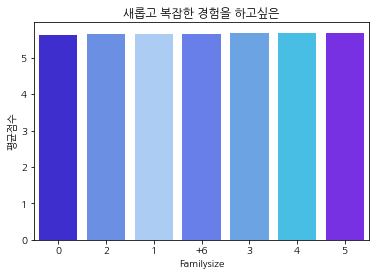

In [85]:
sns.barplot(data = mean_score, x=mean_score.index, y='tp05', palette=col)
plt.xlabel('Familysize')
plt.ylabel('평균점수')
plt.title('새롭고 복잡한 경험을 하고싶은')
plt.show()

## tp06

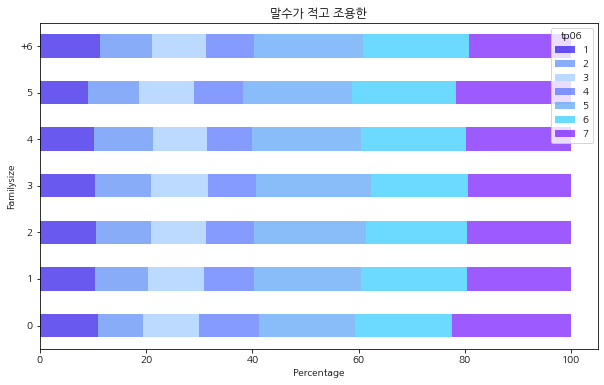

In [86]:
tp06_familysize.plot(kind='barh', figsize=(10,6),stacked=True, alpha = 0.7, color=col)
plt.xlabel('Percentage')
plt.ylabel('Familysize')
plt.title('말수가 적고 조용한')
plt.show()

In [87]:
mean_score = data.groupby(['familysize'])['tp06'].mean().to_frame().sort_values(by='tp06')

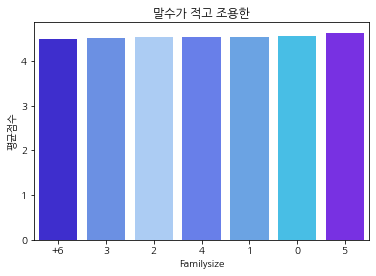

In [88]:
sns.barplot(data = mean_score, x=mean_score.index, y='tp06', palette=col)
plt.xlabel('Familysize')
plt.ylabel('평균점수')
plt.title('말수가 적고 조용한')
plt.show()

# 연령대별 질문 응답 분포
# tp05

In [89]:
age = ['10s','20s','30s','40s','+50s']

In [90]:
tp05_pivot = pd.pivot_table(data=tp05, index='age_group', columns='tp05',
              aggfunc='size')

In [91]:
tp05_pivot = tp05_pivot.div(tp05_pivot.sum(axis=1), axis=0) * 100

In [92]:
tp05_pivot = tp05_pivot.reindex(age)

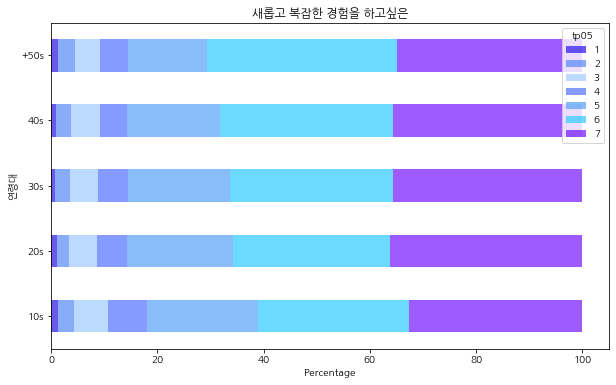

In [93]:
tp05_pivot.plot(kind='barh', figsize=(10,6), stacked=True, 
                color=col,alpha =0.7)

plt.xlabel('Percentage')
plt.ylabel('연령대')
plt.title('새롭고 복잡한 경험을 하고싶은')
plt.show()

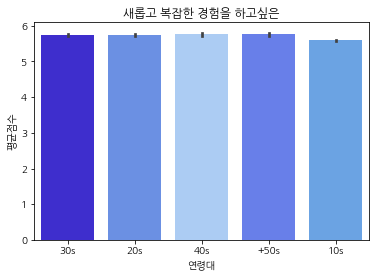

In [94]:
sns.barplot(data = tp05, x='age_group', y='tp05', estimator=np.mean,palette=col)
plt.xlabel('연령대')
plt.ylabel('평균점수')
plt.title('새롭고 복잡한 경험을 하고싶은')
plt.show()

## tp06

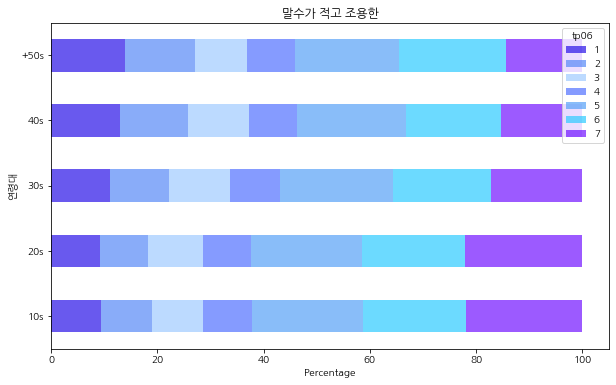

In [95]:
tp06_pivot = pd.pivot_table(data=tp06, index='age_group', columns='tp06',
              aggfunc='size')

tp06_pivot = tp06_pivot.div(tp06_pivot.sum(axis=1), axis=0) * 100

tp06_pivot = tp06_pivot.reindex(age)

tp06_pivot.plot(kind='barh', figsize=(10,6), stacked=True, 
                color=col,alpha =0.7)

plt.xlabel('Percentage')
plt.ylabel('연령대')
plt.title('말수가 적고 조용한')
plt.show()

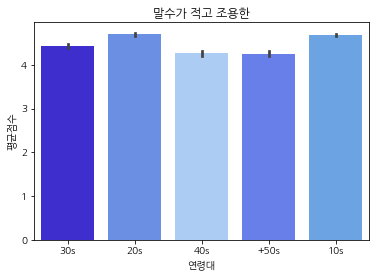

In [96]:
sns.barplot(data = tp06, x='age_group', y='tp06', estimator=np.mean,palette=col)
plt.xlabel('연령대')
plt.ylabel('평균점수')
plt.title('말수가 적고 조용한')
plt.show()